In [ ]:
import sys
sys.path.append('/home/jovyan/workspace')

In [ ]:
import planetengine
import modelscripts

In [ ]:
# import underworld as uw
# from underworld import function as fn
# from underworld.function._function import Function as UWFn

# ### This is a working example
# ### of a custom-made Underworld function!

# class Clip(UWFn):
#     # this function will take the input
#     # and normalise it over an interval
#     def __init__(self, inFn, lBnd, uBnd, *args, **kwargs):

#         # Sanitising the inputs:

#         _inFn = UWFn.convert(inFn)
#         if _inFn == None:
#             raise ValueError( "Provided 'inFn' must a 'Function' or convertible type.")
#         self._inFn = _inFn

#         _lBnd = UWFn.convert(lBnd)
#         if _lBnd == None:
#             raise ValueError( "Provided 'lBnd' must a 'Function' or convertible type.")
#         self._lBnd = _lBnd

#         _uBnd = UWFn.convert(uBnd)
#         if _uBnd == None:
#             raise ValueError( "Provided 'uBnd' must a 'Function' or convertible type.")
#         self._uBnd = _uBnd

#         # Building the actual function:
        
#         _clipFn = fn.branching.conditional([
#             (self._inFn < self._lBnd, self._lBnd),
#             (self._inFn > self._uBnd, self._uBnd),
#             (True, self._inFn)
#             ])
#         self._clipFn = _clipFn

#         # Setting the attribute for the underlying 'c' object:

#         self._fncself = self._clipFn._fncself

#         # Building the parent:

#         super(Clip, self).__init__(argument_fns = [_inFn, _lBnd, _uBnd], **kwargs)

In [ ]:
system = modelscripts.arrhenius.build()
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
    system,
    )
system.solve()

In [ ]:
planetengine.quickShow(system.temperatureField)

In [ ]:
# myfn = Clip(system.temperatureField, 0.2, 0.8)

In [ ]:
# myfn.evaluate(system.mesh)

In [ ]:
# planetengine.quickShow(myfn)

In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
# import underworld as uw
# from underworld import function as fn
# from underworld.function._function import Function as UWFn
# # from planetengine.utilities import stringify

In [3]:
import planetengine
import modelscripts
system = modelscripts.arrhenius.build()
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
    system,
    )
system.solve()

In [16]:
from planetengine import functions
import numpy as np
anVar = \
    functions.Binarise(
        functions.HandleNaN(
            0.,
            functions.Quantile(
                3,
                1,
                functions.Region(
                    'test',
                    np.array([[0.2, 0.1], [0.9, 0.3], [0.8, 0.7], [0.4, 0.9]]),
                    functions.Operations(
                        'abs',
                        functions.Gradient(
                            'rad',
                            functions.Component(
                                'mag',
                                functions.Variable(
                                    system.velocityField,
                                    varName = 'velocityField'
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )

In [21]:
myfn = system.temperatureField * anVar

In [30]:
system.velocityField.evaluate_global(system.mesh.data)

array([[ -5.3630938 ,  -7.88307385],
       [-15.20550256, -39.72098774],
       [-23.93313866, -67.93849724],
       ..., 
       [  9.56504686, -13.66146331],
       [  9.74907584, -14.13222223],
       [  9.93165949, -14.59828723]])

In [34]:
any(myfn.evaluate_global(system.mesh.data))

True

Fitted 1 variables to the figure.



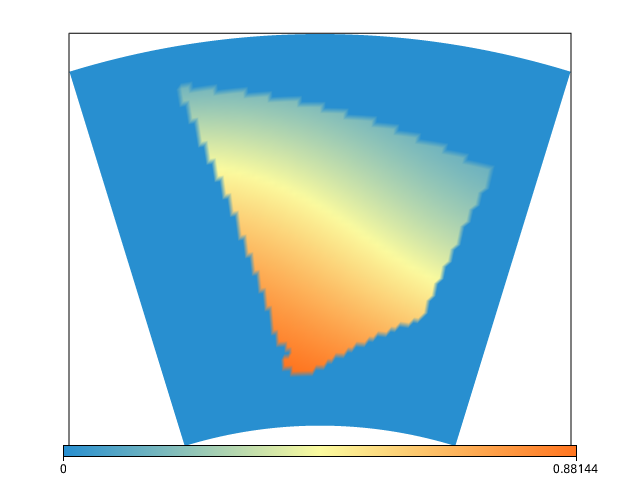

In [24]:
planetengine.quickShow(myfn)

In [23]:
system.iterate()

In [ ]:
class MyClass:
    myattr = "I am an attribute."
    def __init__(self):
        self.myattr = "Mangos!"
        self.function()
    @staticmethod
    def function():
        print("Hello world!")
class MySubClass(MyClass):
    myattr = "Bananas!"
    def __init__(self):
        self.myattr = "Apricots!"
        super().__init__()

In [ ]:
inFn, lBnd, uBnd = system.temperatureField, fn.misc.constant(0.2), fn.misc.constant(0.8)
var = fn.branching.conditional([
    (inFn < lBnd, lBnd),
    (inFn > uBnd, uBnd),
    (True, inFn)
    ])

In [ ]:
var._clauses

In [ ]:
var = system.temperatureField * system.velocityField

In [ ]:
dir(var)

In [ ]:
c, d, e = a = (1, 2, 3)

In [ ]:
[1]

In [ ]:
myinst.myattr

In [ ]:
def myfn(arg1, arg2 = 'world'):
    print(arg1)
    print(arg2)

In [ ]:
myconst = fn.misc.constant(1)

In [ ]:
myinst = MyClass()

In [ ]:
list(system.temperatureField._underlyingDataItems)[0] is system.temperatureField

In [ ]:
uwNamesToFns = {
    'pow': fn.math.pow,
    'abs': fn.math.abs,
    'cosh': fn.math.cosh,
    'acosh': fn.math.acosh,
    'tan': fn.math.tan,
    'asin': fn.math.asin,
    'log': fn.math.log,
    'atanh': fn.math.atanh,
    'sqrt': fn.math.sqrt,
    'abs': fn.math.abs,
    'log10': fn.math.log10,
    'sin': fn.math.sin,
    'asinh': fn.math.asinh,
    'log2': fn.math.log2,
    'atan': fn.math.atan,
    'sinh': fn.math.sinh,
    'cos': fn.math.cos,
    'tanh': fn.math.tanh,
    'erf': fn.math.erf,
    'erfc': fn.math.erfc,
    'exp': fn.math.exp,
    'acos': fn.math.acos,
    'dot': fn.math.dot,
    'add': fn._function.add,
    'subtract': fn._function.subtract,
    'multiply': fn._function.multiply,
    'divide': fn._function.divide,
    'greater': fn._function.greater,
    'greater_equal': fn._function.greater_equal,
    'less': fn._function.less,
    'less_equal': fn._function.less_equal,
    'logical_and': fn._function.logical_and,
    'logical_or': fn._function.logical_or,
    'logical_xor': fn._function.logical_xor,
    'input': fn._function.input,
    'constant': fn.misc.constant,
    'meshVar': uw.mesh._meshvariable.MeshVariable,
    'swarmVar': uw.swarm._swarmvariable.SwarmVariable,
    }
uwFnsToNames = {val: key for key, val in uwNamesToFns.items()}

In [ ]:
def convert(argument):
    _argument = UWFn.convert(argument)
    if _argument is None:
        raise ValueError(
            "Provided functions must be Underworld functions \
            or convertible types."
            )
    if not hasattr(_argument, '_opTag'):
        try:
            _argument._opTag = stringify(argument)
        except:
            _argument = Base(_argument, 'Anon')
    return _argument

In [ ]:
def make_opTag(argument_fns):
    inTags = [arg._opTag for arg in argument_fns]
    opTags = '{' + ';'.join(inTags) + '}'
    return opTags

In [ ]:
class PlanetVar:
#     def __init__(self, *args, **kwargs):
    def __init__(self):
        pass
    @staticmethod
    def convert(obj):
        """
        Attempts to convert obj into a PlanetVar.
        """
#         uwfn = UWFn.convert(obj)
#         for fn in sorted(list(uwfn._underlyingDataItems)):
#             if fn in uwFnsToNames:
        pass

In [ ]:
class Clip(PlanetVar, UWFn):
# class Clip(PlanetVar):
    '''
    This function will take the input \
    and normalise it over an interval.
    '''

    _opTag = 'Clip'

    def __init__(self, inFn, lBnd, uBnd, *args, **kwargs):

        # Sanitising the inputs:

        _inFn, _lBnd, _uBnd = [UWFn.convert(arg) for arg in [inFn, lBnd, uBnd]]

        # Building the function:

        _clipFn = fn.branching.conditional([
            (_inFn < _lBnd, _lBnd),
            (_inFn > _uBnd, _uBnd),
            (True, _inFn)
            ])

        # Setting important attributes:

        self._argument_fns = [_inFn, _lBnd, _uBnd]
        self._fncself = _clipFn._fncself
#         self._opTag = 'Clip' + make_opTag(self._argument_fns)
        print([type(arg) for arg in self._argument_fns])

        # Building the parent:

        PlanetVar.__init__(self, **kwargs)
        UWFn.__init__(self, self._argument_fns, **kwargs)
#         super().__init__(self._argument_fns, **kwargs)
#         super().__init__()

In [ ]:
class Base(UWFn, PlanetVar):
    '''
    Creates a new function
    that passively 'hosts' the input function
    but sets it as a 'base'
    for future functions to chain from;
    most importantly, sets a new 'opTag'.
    '''

    _opTag = 'Base'

    def __init__(self, inFn, *args, name = 'Anon', **kwargs):

        # Sanitise the inputs:
        if not type(name) == str:
            raise Exception
        badchars = '{}_-;'
        if any([badchar in name for badchar in badchars]):
            raise Exception

        # Building the function:

        _inFn = UWFn.convert(inFn)
        if _inFn is None:
            raise ValueError(
                "Provided functions must be Underworld functions \
                or convertible types."
                )
#         self.__dict__.update(_inFn.__dict__)

        # Setting important attributes:

        self._argument_fns = [_inFn]
        self._fncself = _inFn._fncself
        self._opTag = name + '{}'

        # Building the parent:

        UWFn.__init__(self, self._argument_fns, **kwargs)
        PlanetVar.__init__(self)

In [ ]:
myinst = Base(1, "h")

In [ ]:
dir(myinst)

In [ ]:
from underworld import function as fn
myfn = fn.misc.constant(1)

In [ ]:
myfn = system.temperatureField * system.viscosityFn * system.velocityField

In [ ]:
list(myfn._underlyingDataItems)

In [ ]:
rootFn = Base(system.viscosityFn, 'viscosityFn')

In [ ]:
rootFn._opTag

In [ ]:
clipFn = Clip(system.viscosityFn, 0.2, 0.8)

In [ ]:
clipFn.evaluate

In [ ]:
str(type('a'))

In [ ]:
from abc import ABCMeta, abstractmethod

In [ ]:
class First:
    def __init__(self, *args, **kwargs):
        pass
#         self.firstattr = "first"
#         super().__init__()
#         print("I am first!")
class Second(uw._stgermain.LeftOverParamsChecker, metaclass = ABCMeta):
    def __init__(self, inObj, **kwargs):
        self.secondattr = "second"
        self.inObj = inObj
class Third(First, Second):
    def __init__(self, *args, **kwargs):
        self.thirdattr = "third"
        print("I am third!")
        super().__init__(self.thirdattr)
#         First.__init__(self)
#         Second.__init__(self)

In [ ]:
myInst = Third()

In [ ]:
dir(myInst)

In [ ]:
# class Clip(UWFn):
#     '''
#     This function will take the input \
#     and normalise it over an interval.
#     '''

#     _opTag = 'Clip'

#     def __init__(self, inFn, lBnd, uBnd, *args, **kwargs):

#         # Sanitising the inputs:

#         _inFn, _lBnd, _uBnd = [convert(arg) for arg in [inFn, lBnd, uBnd]]

#         # Building the function:

#         _clipFn = fn.branching.conditional([
#             (_inFn < _lBnd, _lBnd),
#             (_inFn > _uBnd, _uBnd),
#             (True, _inFn)
#             ])

#         # Setting important attributes:

#         self._argument_fns = [_inFn, _lBnd, _uBnd]
#         self._fncself = _clipFn._fncself
#         self._opTag = 'Clip' + make_opTag(self._argument_fns)

#         # Building the parent:

#         super(Clip, self).__init__(self._argument_fns, **kwargs)